
Accuracy: 0.7932960893854749

Confusion Matrix:
 [[94 16]
 [21 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Feature Coefficients:
         Feature  Coefficient
1       Sex_num     1.245438
6  Embarked_num     0.210626
3          Fare     0.087304
5       IsAlone    -0.289284
2           Age    -0.476790
4    FamilySize    -0.479891
0        Pclass    -0.891126


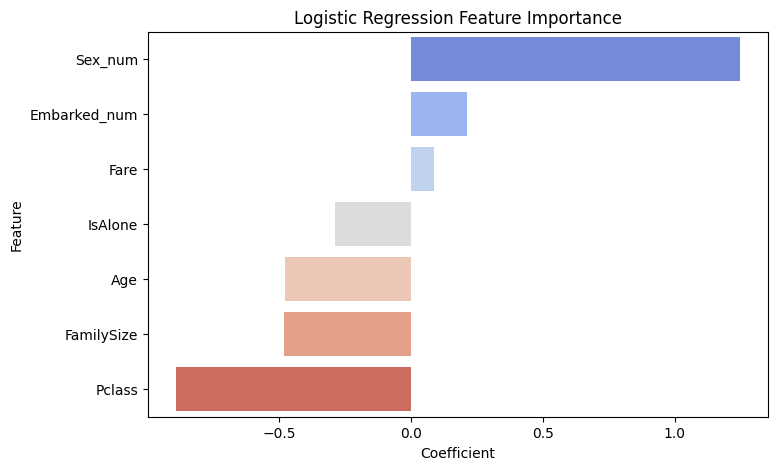

In [6]:
# Titanic Logistic Regression Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load dataset
df = pd.read_csv(r"D:\Faizi Internship\Task 3\Titanic-Dataset.csv")

# Step 2: Handle missing values (basic cleaning)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Cabin'] = df['Cabin'].fillna("Unknown")

# Step 3: Feature Engineering
# Convert Sex → numeric
df['Sex_num'] = df['Sex'].map({'male':0, 'female':1})

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Deck (first letter of Cabin)
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != "Unknown" else "U")

# Encode Embarked
df['Embarked_num'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Step 4: Select features for classification
features = ['Pclass','Sex_num','Age','Fare','FamilySize','IsAlone','Embarked_num']
X = df[features]
y = df['Survived']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 8: Predictions & Evaluation
y_pred = model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:\n", coefficients)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, 
            hue='Feature', dodge=False, palette="coolwarm", legend=False)

plt.title("Logistic Regression Feature Importance")
plt.show()
